In [142]:
import pickle
import matplotlib.pyplot as plt

In [180]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':45,
    'ytick.labelsize':45
})

In [144]:
def unpickle(savename):
    with open('./pickles/'+savename+'.pkl', 'rb') as handle:
        return pickle.load(handle)

In [145]:
sampled = [
  "page2-34",
  "page9-46",
  "page3-85",
  "page7-107",
  "page8-159",
  "page6-203",
  "page2-112",
  "page1-116",
  "page1-69",
  "page8-234",
  "page8-21",
  "page5-75",
  "page1-0",
  "page5-59",
  "page3-121",
  "page6-164",
  "page4-128",
  "page5-136",
  "page6-99",
  "page7-14",
  "page5-128",
  "page9-27",
  "page7-105",
  "page6-162",
  "page9-13",
  "page1-128",
  "page5-186",
  "page3-72",
  "page4-157",
  "page3-182",
  "page7-197",
  "page7-180",
  "page6-143",
  "page7-81",
  "page3-136",
  "page5-64",
  "page7-218",
  "page3-128",
  "page7-26",
  "page6-78",
  "page4-24",
  "page5-153",
  "page7-248",
  "page5-244",
  "page4-93",
  "page5-28",
  "page8-235",
  "page5-200",
  "page2-131",
  "page8-183",
  "page1-119",
  "page5-232",
  "page1-129",
  "page4-162",
  "page3-41",
  "page6-180",
  "page6-149",
  "page1-105",
  "page4-10",
  "page5-178",
  "page2-137",
  "page3-35",
  "page-A",
  "page-B",
  "page-C",
  "page-D",
  "page-E",
  "page-F",
  "page-G",
  "page-H",
  "page-I",
  "page-J",
  "page-K",
  "page-L",
]

In [147]:
SPARSE_SA=unpickle('CUSTOM_sparse_1000')
DENSE_SA=unpickle('CUSTOM_dense_1000')
# SPARSE74_SA=unpickle('BASIC_sparse74_1000')
SPARSE_WHOLE=unpickle('CUSTOM_sparse_whole_1000')
SPARSE_PART=unpickle('CUSTOM_sparse_part_1000')
DENSE_WHOLE=unpickle('CUSTOM_dense_whole_1000')
DENSE_PART=unpickle('CUSTOM_dense_part_1000')
# SPARSE74_WHOLE=unpickle('BASIC_sparse74_whole_5000')
# SPARSE74_PART=unpickle('BASIC_sparse74_part_5000')

In [148]:
SPARSE74_SA={k:v for k,v in SPARSE_SA.items() if k in sampled}
SPARSE74_WHOLE={k:v for k,v in SPARSE_WHOLE.items() if k in sampled}
SPARSE74_PART={k:v for k,v in SPARSE_PART.items() if k in sampled}

In [149]:
def graph_data(file_to_pairs):
    means=[]
    lower_err=[]
    upper_err=[]
    for file, (ci_l, ci_u, m) in file_to_pairs.items():
        means.append(m)
        lower_err.append(m-ci_l)
        upper_err.append(ci_u-m)
#         if h==None:
#             errs.append(0)
#         else:
#             errs.append(h)
    means, lower_err, upper_err = (list(t) for t in zip(*sorted(zip(means, lower_err, upper_err))))  
    
#     plt.figure(figsize=(10, 10))
    plt.errorbar(list(range(len(means))), means, yerr=[lower_err, upper_err], fmt="o", ecolor="black")

In [150]:
def d_graph_data(file_to_pairs):
    means=[]
    lower_err=[]
    upper_err=[]
    dense_idx=[]
    counter=0
    for file, (ci_l, ci_u, m) in file_to_pairs.items():
        means.append(m)
        lower_err.append(m-ci_l)
        upper_err.append(ci_u-m)
#         if h==None:
#             errs.append(0)
#         else:
#             errs.append(h)
        if file in sampled:
            dense_idx.append(counter)
        counter+=1
    original_idx= list(range(len(means)))
    means, lower_err, upper_err, original_idx = (list(t) for t in zip(*sorted(zip(means, lower_err, upper_err, original_idx))))  
    dense_ranks=[original_idx.index(i) for i in dense_idx]
    
#     plt.figure(figsize=(10, 10))
    plt.errorbar(dense_ranks, [means[i] for i in dense_ranks], yerr=[[lower_err[i] for i in dense_ranks],[upper_err[i] for i in dense_ranks]], fmt="o", ecolor="red")
    
    

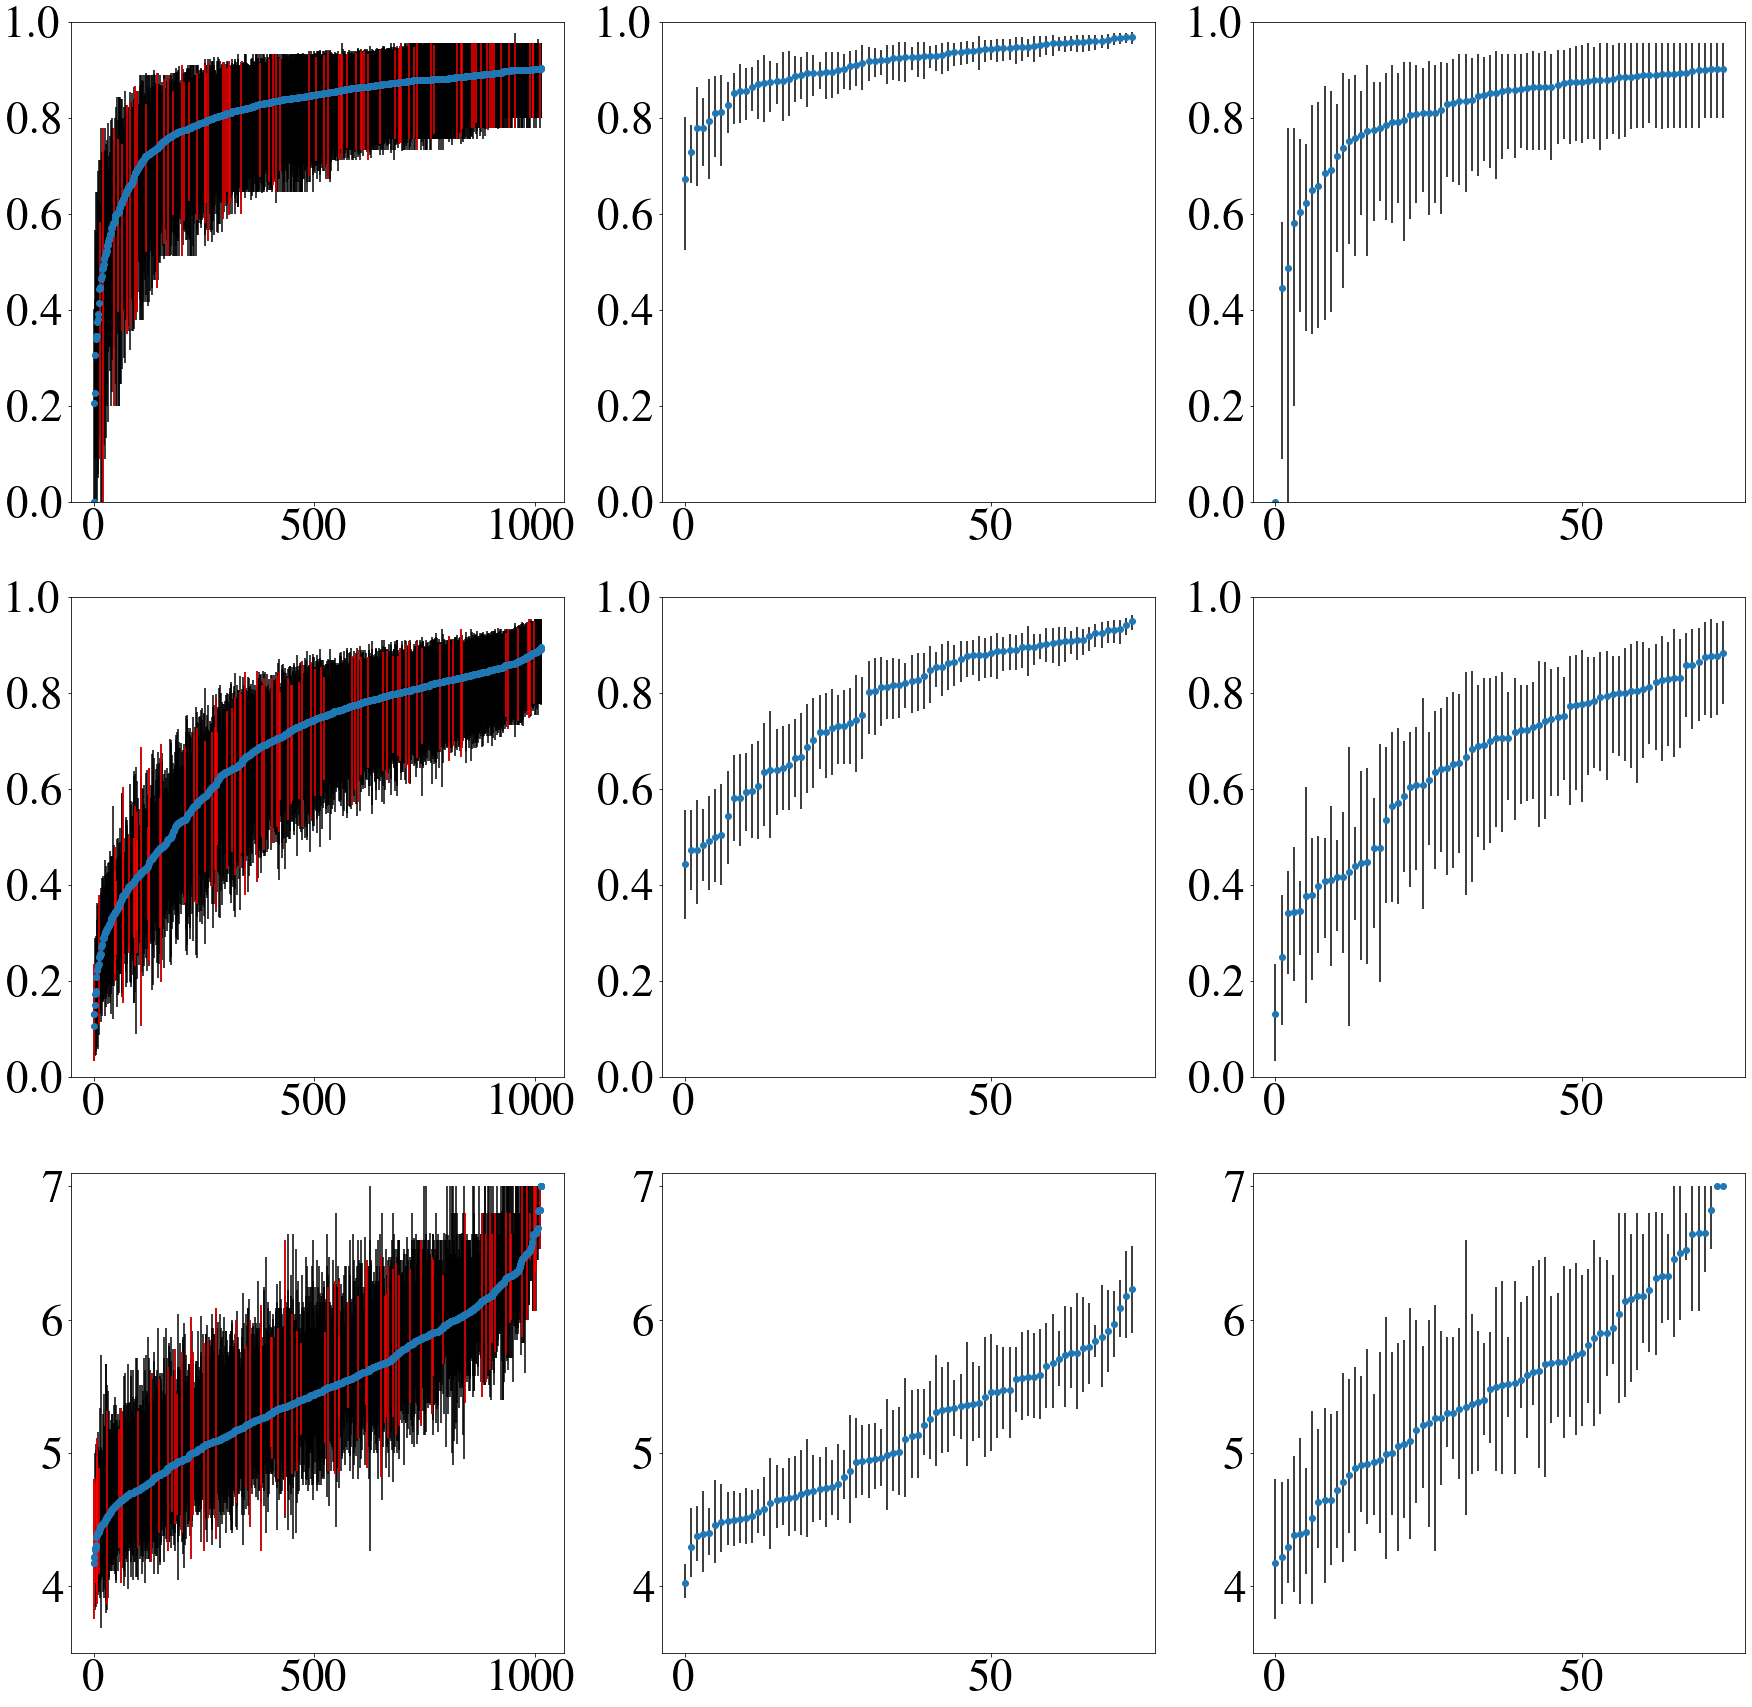

In [182]:
fig,axes = plt.subplots(3,3,figsize=(30,30))


ax10=plt.subplot(3, 3, 1)
ax10.set_ylim([0, 1])
graph_data(SPARSE_WHOLE)
d_graph_data(SPARSE_WHOLE)

ax11=plt.subplot(3, 3, 2)
ax11.set_ylim([0, 1])
graph_data(DENSE_WHOLE)
# d_graph_data(SPARSE74_WHOLE)

ax12=plt.subplot(3, 3, 3)
ax12.set_ylim([0, 1])
graph_data(SPARSE74_WHOLE)
# d_graph_data(DENSE_WHOLE)

ax20=plt.subplot(3, 3, 4)
ax20.set_ylim([0,1])
graph_data(SPARSE_PART)
d_graph_data(SPARSE_PART)

ax21=plt.subplot(3, 3, 5)
graph_data(DENSE_PART)
ax21.set_ylim([0,1])
# d_graph_data(SPARSE74_PART)

ax22=plt.subplot(3, 3, 6)
ax22.set_ylim([0,1])
graph_data(SPARSE74_PART)
# d_graph_data(DENSE_PART)


ax30=plt.subplot(3, 3, 7)
ax30.set_ylim([3.5,7.1])
graph_data(SPARSE_SA)
d_graph_data(SPARSE_SA)

ax31=plt.subplot(3, 3, 8)
ax31.set_ylim([3.5,7.1])
graph_data(DENSE_SA)
# d_graph_data(SPARSE74_SA)

ax32=plt.subplot(3, 3, 9)
ax32.set_ylim([3.5,7.1])
graph_data(SPARSE74_SA)
# d_graph_data(DENSE_SA)



plt.savefig('rankings.pdf')

# Correlation

In [152]:
from scipy import stats
import numpy as np

In [153]:
def rank_tangrams(file_to_pairs):
    '''
    Returns files in ranked order (mean low to high)
    '''
    means=[]
    files=[]
    for file, (_,_,mean) in file_to_pairs.items():
        means.append(mean)
        files.append(file)
    means, files = (list(t) for t in zip(*sorted(zip(means, files))))  
#     print(means, files)
    
    return files

In [154]:
def get_ranks(data):
    '''
    Ranks of the tangrams, in the order of the sampled files
    '''
    ranked_files=rank_tangrams(data)
    file_to_rank = {f:i for i,f in enumerate(ranked_files)}
    return [file_to_rank[s] for s in sampled]

In [155]:
m={}

In [165]:
def ranking_correlation(d1, d2):
    idx1=get_ranks(d1)
    idx2=get_ranks(d2)
    plt.scatter(idx1,idx2)
    plt.show()
    for i, s in enumerate(sampled):
        m[s] = str(idx1[i])+'-->'+str(idx2[i])
    r,p = stats.spearmanr(idx1,idx2)
    print(r,p)

In [173]:
def value_correlation(d1, d2):
    v1=[]
    v2=[]
    for s in sampled:
        v1.append(d1[s][2]) # (_,_,mean)
        v2.append(d2[s][2])
        m[s] = (m[s], str(d1[s][2])+'-->'+str(d2[s][2]))
    plt.scatter(v1,v2)
    plt.show()
#     diff=np.array(v1)-np.array(v2)
    r,p = stats.spearmanr(v1,v2)
    print(r,p)

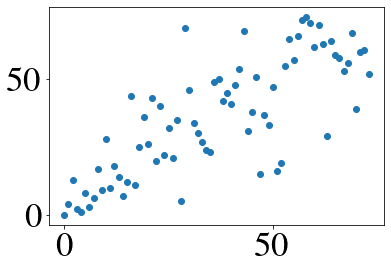

0.7811181044057756 2.227751864840918e-16


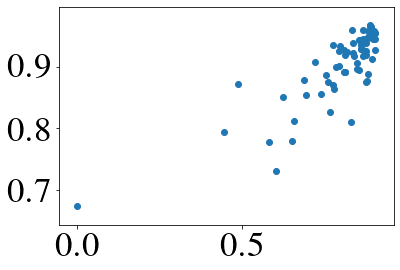

0.7811181044057756 2.227751864840918e-16


In [174]:
ranking_correlation(SPARSE74_WHOLE, DENSE_WHOLE)
value_correlation(SPARSE74_WHOLE, DENSE_WHOLE)

In [175]:
m

{'page2-34': ('8-->17', '0.6855333333333334-->0.8799523060796648'),
 'page9-46': ('29-->69', '0.8315240740740741-->0.961613265781505'),
 'page3-85': ('57-->72', '0.8855500000000001-->0.9683598814707305'),
 'page7-107': ('66-->58', '0.8924657407407409-->0.952164961296565'),
 'page8-159': ('70-->39', '0.9005111111111113-->0.9286721698113208'),
 'page6-203': ('35-->23', '0.8509666666666666-->0.896183525986592'),
 'page2-112': ('49-->33', '0.8744990740740741-->0.9206154269472665'),
 'page1-116': ('11-->10', '0.7368333333333333-->0.8565201781970652'),
 'page1-69': ('16-->44', '0.774851851851852-->0.9368632657815051'),
 'page8-234': ('0-->0', '0.0-->0.6725526729559748'),
 'page8-21': ('1-->4', '0.4451611111111112-->0.7939907407407408'),
 'page5-75': ('5-->8', '0.6230777777777777-->0.8512811844863732'),
 'page1-0': ('21-->43', '0.7950222222222222-->0.9355858611514272'),
 'page5-59': ('28-->5', '0.8286055555555556-->0.8103574625060473'),
 'page3-121': ('36-->49', '0.852111111111111-->0.9439612

In [176]:
SPARSE74_WHOLE['page8-21']

(0.08888888888888888, 0.5833333333333334, 0.4451611111111112)

In [177]:
DENSE_WHOLE['page8-21']

(0.6729341369671562, 0.8805293501048223, 0.7939907407407408)

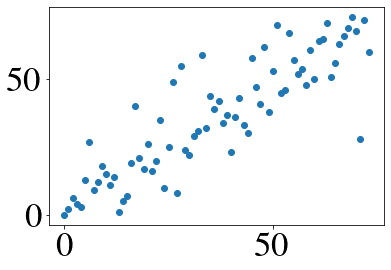

0.8695001851166232 9.434016792012124e-24


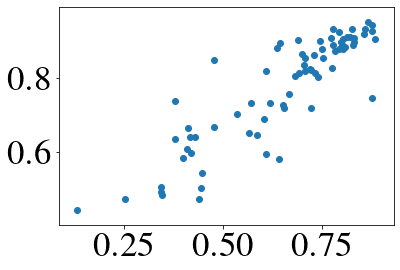

0.8695001851166232 9.434016792012124e-24


In [178]:
ranking_correlation(SPARSE74_PART, DENSE_PART)
value_correlation(SPARSE74_PART, DENSE_PART)

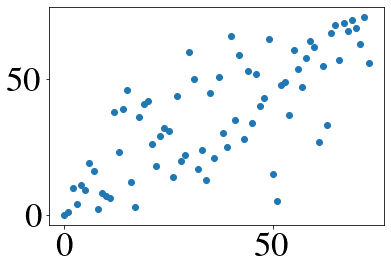

0.762251018141429 3.0496021320662647e-15


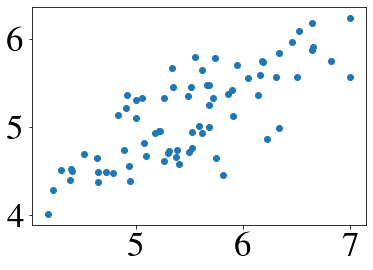

0.7625084228896406 2.94747567186806e-15


In [179]:
ranking_correlation(SPARSE74_SA, DENSE_SA)
value_correlation(SPARSE74_SA, DENSE_SA)